### Please use the following dataset for problems 1 - 6

In [1]:
# dependencies
import pandas as pd

# data source
URL_adult='https://raw.githubusercontent.com/kamranbakhtiari/DESC624/main/Adult'
adult = pd.read_csv(URL_adult)

# data first view
adult.head()

,age,workclass,demogweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K.
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K.
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K.
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K.
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K.


#### 1. Partition the data set, so that 50% of the records are included in the training data set and 50% are included in the test data set. Use a bar graph to conifrm your proportions

<AxesSubplot:xlabel='name', ylabel='partition'>

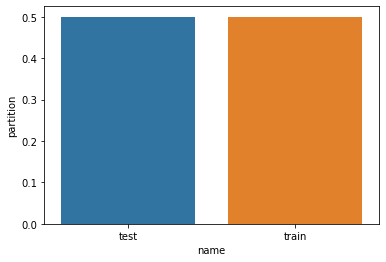

In [2]:
# dependencies
from sklearn.model_selection import train_test_split
import seaborn as sns

# split train and test dataset
train, test = train_test_split(adult, test_size = 0.5, random_state = 100)

# plot the result 
partition = pd.DataFrame({'name':['test', 'train'],
                          'partition':[len(test)/len(adult), len(train)/len(adult)]
                          })
sns.barplot(x='name', y='partition', data=partition)

Utilize train_test_split function from sklearn's model_selection package. Split dataset into half and half for traning and testing.

Plot the result.

#### 2. Identify the total number of records in the training data set, and how many records in the training data set have an income value of < 50k

In [3]:
# overview
train["income"].value_counts()

<=50K.    9541
>50K.     2959
Name: income, dtype: int64

In [4]:
# locate records where income < 50k
below_50k = train.loc[train["income"] == '<=50K.']
# print out the result
print('There are ', len(below_50k), ' records in the training dataset which contain an income value of <=50K.')

There are  9541  records in the training dataset which contain an income value of <=50K.


First, utilize loc() function to find all records have an income value of <50k.

Second, use len() to calculate how many records in the training set, print out the result.

#### 3. Use your answers from the previous excercise to calculate how many records with income >50k you need to resmaple in order to have 35% of the rebalanced data set have incomes of >50k

In [5]:
# locate records where income > 50k
above_50k = train.loc[train["income"] == '>50K.']
print('There are ', len(above_50k), ' records in the training dataset which contain an income value of <=50K.')

There are  2959  records in the training dataset which contain an income value of <=50K.


In [6]:
# calculate number of resample 
resample_size = (0.35*len(train) - len(above_50k)) / (1-0.35)
round(resample_size)

2178

First, calculate how many records that contain >50k. Then, calculate how many records we need to resample in order to meet 35%. It turns out 2178.

#### 4. Perform the rebalancing described in the previous exercise and confirm that 35% of the records in the rebalanced data set have incomes >50k

In [7]:
# sample for the interest
resample = above_50k.sample(n = 2178, replace = True)

In [8]:
# add resampled records to orginal training data
train_rebal = pd.concat([train, resample])
train_rebal.shape

(14678, 15)

In [9]:
train_rebal.income.value_counts(normalize=True)

<=50K.    0.65002
>50K.     0.34998
Name: income, dtype: float64

2178 specifies how many records to draw, while the input replace = True specifies to sample with replacement. The output is a data set made up of these 2178 randomly resampled records.

Nest, I add the resmapled records to the orginal training data set.2178 specifies how many records to draw, while the input replace = True specifies to sample with replacement. The output is a data set made up of these 2178 randomly resampled records.

Finally, I add the resmapled records to the orginal training data set.

#### 5. Validate your partition by performing a two-sample Z-test for the difference in means for the mean age in the training set versus the mean age in the test set?

In [10]:
# dependencies
from statsmodels.stats.weightstats import ztest as ztest

In [11]:
ztest(train_rebal['age'], test['age'])

(4.927095406043531, 8.346100807775882e-07)

I used ztest function from statsmodels package to calculate z-score and p-value for age of both groups.

As shown above, z-value: 4.651 and p-value: 3.301e-06

The test result is statistical significant since p-value is less than 0.05, and z-value is greater than 1.96 (under 95% CI) at the same time.

#### 6. Validate your partition by performing a two-sample Z-test for the difference in proportion of >50k records in the training set versus the proportion of >50k records in the test set?

In [12]:
# locate target data
train_rebal_ab_50k = train_rebal.loc[train_rebal["income"] == '>50K.']
test_above_50k = test.loc[test["income"] == '>50K.']

In [13]:
# dependencies
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

In [14]:
counts = np.array([len(train_rebal_ab_50k), len(test_above_50k)])
nobs = np.array([len(train_rebal), len(test)])

In [15]:
z_value, p_value = proportions_ztest(counts, nobs)

In [16]:
print('The z-value is: ', z_value)
print('The p-value is: ', p_value)

The z-value is:  19.354451776138237
The p-value is:  1.869732110677899e-83


The test result is statistical significant since p-value is less than 0.05, and z-value is greater than 1.96 (under 95% CI) at the same time.

Thus, we reject the null hypothesis of "the proporation of income >50k in two data set are the same".

### Please use the following dataset for problems 7 - 8

In [17]:
import pandas as pd

URL_loan_training='https://raw.githubusercontent.com/kamranbakhtiari/DESC624/main/Loans_Training'
URL_loan_test='https://raw.githubusercontent.com/kamranbakhtiari/DESC624/main/Loans_Test'

loan_test = pd.read_csv(URL_loan_test)
loan_training = pd.read_csv(URL_loan_training)

loan_test.head()
loan_training.head()

,Approval,Debt-to-Income Ratio,FICO Score,Request Amount,Interest
0,F,0.0,397,1000,450.0
1,F,0.0,403,500,225.0
2,F,0.0,408,1000,450.0
3,F,0.0,408,2000,900.0
4,F,0.0,411,5000,2250.0


#### 7. Create a CART model using the training data set that predicts Approval using Debt to Income Ratio, FICO score, and Request Amount. Visualize the decision Tree (make sure the decision tree appears directly in this workbook, not a seperate .dot file). Describe the first few splits in the decision tree. What do the values in the brackets represent? The sample size for each node? the Root?

In [18]:
# dependencies
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image 
from pydot import graph_from_dot_data
import matplotlib as mpl

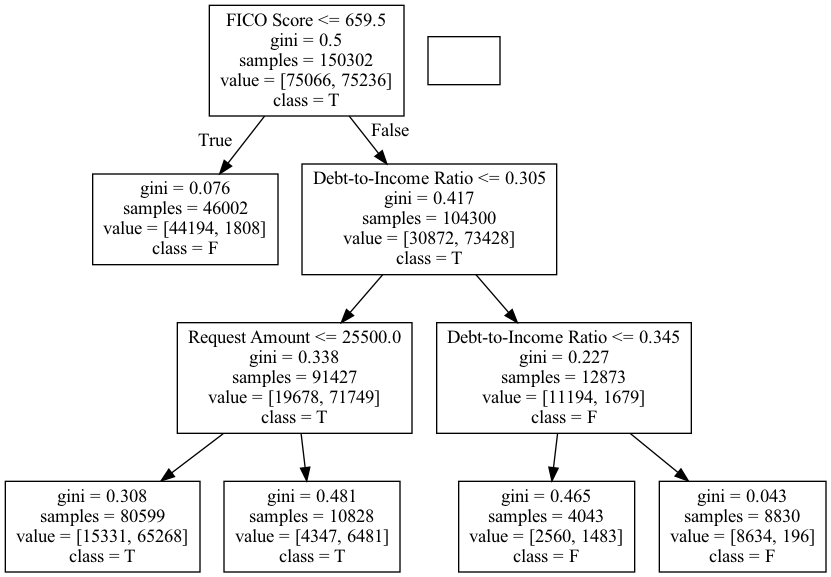

In [19]:
mpl.rcParams["figure.dpi"] = 150

y = loan_training[['Approval']]
X_names=["Debt-to-Income Ratio", "FICO Score", "Request Amount"]
clf1=DecisionTreeClassifier(criterion="gini", max_leaf_nodes=5).fit(loan_training[X_names], y)
export_graphviz(clf1, out_file = "clf1.dot", feature_names=X_names, class_names=['F', 'T'])
decisiontree01= StringIO()
export_graphviz(clf1, out_file = decisiontree01, feature_names=X_names, class_names=['F', 'T'])
(graph, ) = graph_from_dot_data(decisiontree01.getvalue())
Image(graph.create_png())

Provide sentence(s) explaining your solution

#### 8. Create a CART model using the test data set that uses the same target and predictor variables. Visualize the decision Tree (make sure the decision tree appears directly in this workbook, not a seperate .dot file). Describe the first few splits in the decision tree. What do the values in the brackets represent? The sample size for each node? the Root? Does the tree built using the test data match the tree built using the training data?

In [20]:
# code

Provide sentence(s) explaining your solution